 # Problem Statement:- To analyse the sales data for bigmart for the year 2013 of different stores and prepare a predictive model for sales forcasting.



In [50]:
#Importing the necessary library files

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as XGB
#reading train and test data
train_data = pd.read_csv('G:/Data science projects/bigdatamart_rep-master/bigdatamart_rep-master/bigdatamart_Train.csv')
test_data = pd.read_csv('G:/Data science projects/bigdatamart_rep-master/bigdatamart_rep-master/bigdatamart_Test.csv')

ModuleNotFoundError: No module named 'xgboost'

In [20]:
#Accessing the first 5 elements of the data
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
#Now checking the dimension of data
train_data.shape

(8523, 12)

In [22]:
# The dimension of the data is Rows=8523 and columns=12

Data Preparation

In [23]:
#Statistical summary of the data
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [24]:
# Checking the datatype of each column
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [25]:
#Checking the existence of null values
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [27]:
# combining Item_Fat_Content misspelled
train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [28]:
# creating new column num_years
train_data['num_years'] = train_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 
test_data['num_years'] = test_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 

In [29]:
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


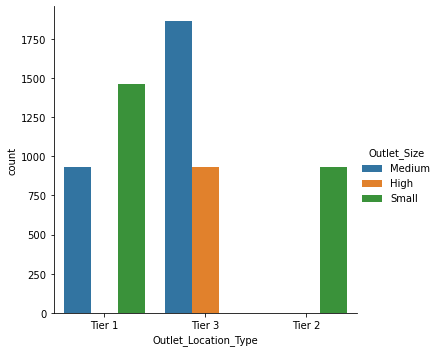

In [30]:
sns.factorplot('Outlet_Location_Type',data = train_data,hue ='Outlet_Size' ,kind='count')

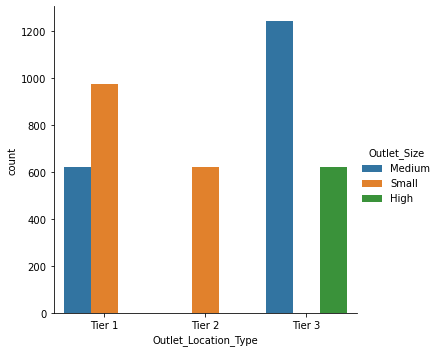

In [31]:
sns.factorplot('Outlet_Location_Type',data = test_data,hue ='Outlet_Size' ,kind='count')

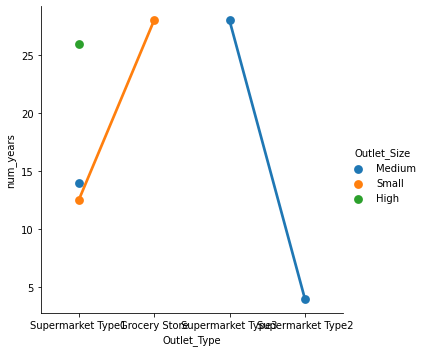

In [32]:
sns.factorplot('Outlet_Type','num_years',data = test_data,hue='Outlet_Size' )

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


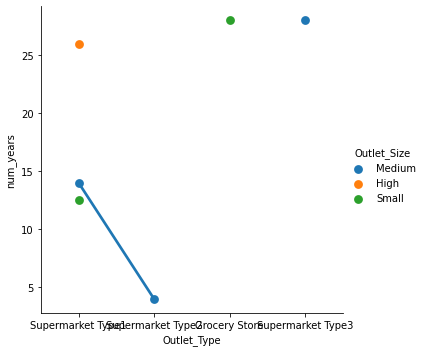

In [33]:
sns.factorplot('Outlet_Type','num_years',data = train_data,hue='Outlet_Size' )

In [34]:
full_data = [train_data, test_data]

In [35]:
# filling null values
for data in full_data:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
    data['Outlet_Size'].fillna('Medium',inplace = True)    

In [36]:
col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [37]:
# handling catagorical variables
train_datar = pd.get_dummies(train_data, columns = col, drop_first = True)
test_datar = pd.get_dummies(test_data, columns = col,drop_first = True)

In [38]:
feat_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'num_years',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [39]:
X = train_datar[feat_cols]
y = train_datar['Item_Outlet_Sales']

In [40]:
# splitting data as X_train and X_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)


In [41]:
# creating XGBoost model
from xgboost.sklearn import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)

ModuleNotFoundError: No module named 'xgboost'

In [45]:
# linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [46]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [47]:
rmse

1132.154574390424

In [ ]:
# predicting on actual test data
X_t = test_datar[feat_cols]
y_result = XGB.predict(X_t)

In [ ]:
y_result

In [ ]:
#creating results .csv file
result = pd.DataFrame()
result['Item_Identifier'] = test_datar['Item_Identifier']
result['Outlet_Identifier'] = test_datar['Outlet_Identifier']

result["Item_Outlet_Sales"] = y_result
result = result.sort_index()
result.to_csv('Bigmart_XGBoost3.csv',index = False)
